# Exercise Solution

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv("HR_comma_sep.csv")
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


## 1. Data Exploration & Visualization

In [14]:
df.shape       # 8535 rows, 10 columns

(8538, 10)

In [17]:
df.count().isna()   # No null values

satisfaction_level       False
last_evaluation          False
number_project           False
average_montly_hours     False
time_spend_company       False
Work_accident            False
left                     False
promotion_last_5years    False
Department               False
salary                   False
dtype: bool

In [21]:
df[df['left']==1].shape # 2000 employees left w.r.t dataset

(2000, 10)

In [22]:
df[df['left']==0].shape  # 6538 employees retain w.r.t dataset

(6538, 10)

In [23]:
df.groupby('left').mean()  # After grouping average of all columns for left and retain

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
left,,,,,,,
0,0.668102,0.718198,3.790303,199.038391,3.09636,0.173448,0.013766
1,0.439955,0.721015,3.877000,207.914000,3.87800,0.052500,0.004000


From above table we can draw following conclusions,

1. **Satisfaction Level**: Satisfaction level seems to be relatively low (0.43) in employees leaving the firm vs the retained ones (0.66)
2. **Average Monthly Hours**: Average monthly hours are higher in employees leaving the firm (199 vs 207)
3. **Promotion Last 5 Years**: Employees who are given promotion are likely to be retained at firm

### >> Feature extraction of text values

In [24]:
pd.crosstab(df.salary,df.left) # pandas crosstab: first parameter indicate what we want in x-axis

left,0,1
salary,,
high,552,48
low,3013,1182
m,1,0
medium,2972,770


In [26]:
df=df[df.salary != 'm']            # removing 'm' outliers
pd.crosstab(df.salary,df.left)

left,0,1
salary,,
high,552,48
low,3013,1182
medium,2972,770


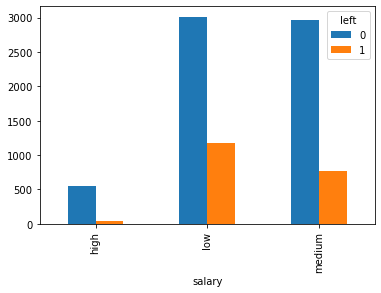

In [27]:
pd.crosstab(df.salary,df.left).plot(kind='bar')    #  impact of salary


Above bar chart shows employees with high salaries are likely to not leave the company

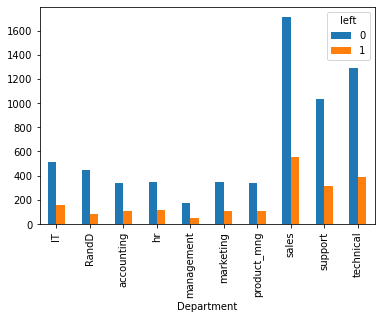

In [28]:
pd.crosstab(df.Department,df.left).plot(kind='bar') # Impact of department on retention

From above chart there seem to be some impact of department on employee retention but it is not major hence we will ignore department in our analysis

##### From the data analysis so far we can conclude that we will use following variables as independant variables in our model
1. **Satisfaction Level**
2. **Average Monthly Hours**
3. **Promotion Last 5 Years**
4. **Salary**

In [30]:
new_df=df[['satisfaction_level','average_montly_hours','promotion_last_5years','salary','left']]
new_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left
0,0.38,157,0,low,1
1,0.80,262,0,medium,1
2,0.11,272,0,medium,1
3,0.72,223,0,low,1
4,0.37,159,0,low,1


Since, salary is categorycal variable here, we should use pandas dummy variable before buiding model

In [31]:
salary_dummies = pd.get_dummies(new_df.salary, prefix="salary")
salary_dummies

,salary_high,salary_low,salary_medium
0,0,1,0
1,0,0,1
2,0,0,1
3,0,1,0
4,0,1,0
...,...,...,...
8532,0,0,1
8533,0,0,1
8534,0,0,1
8535,0,0,1


In [32]:
final_df=pd.concat([new_df,salary_dummies],axis='columns') # Let's concate this two dataframe
final_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,salary,left,salary_high,salary_low,salary_medium
0,0.38,157,0,low,1,0,1,0
1,0.80,262,0,medium,1,0,0,1
2,0.11,272,0,medium,1,0,0,1
3,0.72,223,0,low,1,0,1,0
4,0.37,159,0,low,1,0,1,0


Now, we can drop salary column

In [33]:
final_df.drop('salary',axis='columns',inplace=True)
final_df.head()

,satisfaction_level,average_montly_hours,promotion_last_5years,left,salary_high,salary_low,salary_medium
0,0.38,157,0,1,0,1,0
1,0.80,262,0,1,0,0,1
2,0.11,272,0,1,0,0,1
3,0.72,223,0,1,0,1,0
4,0.37,159,0,1,0,1,0


## 2. Train Test Split &  Building Model

In [36]:
X=final_df.drop('left',axis=1) # axis 1 mean column
X

,satisfaction_level,average_montly_hours,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,157,0,0,1,0
1,0.80,262,0,0,0,1
2,0.11,272,0,0,0,1
3,0.72,223,0,0,1,0
4,0.37,159,0,0,1,0
...,...,...,...,...,...,...
8532,0.85,198,0,0,0,1
8533,0.59,172,0,0,0,1
8534,0.51,216,0,0,0,1
8535,0.50,232,0,0,0,1


In [49]:
y=final_df['left']
y

0       1
1       1
2       1
3       1
4       1
       ..
8532    0
8533    0
8534    0
8535    0
8536    0
Name: left, Length: 8537, dtype: int64

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)

In [51]:
X_test.shape

(2562, 6)

In [52]:
# Logistic regression for binary classification
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

In [53]:
model.fit(X_train, y_train)           # Training the model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Results

In [54]:
model.predict(X_test)

array([0, 0, 0, ..., 0, 1, 0], dtype=int64)

In [55]:
model.predict_proba(X_test) 

array([[0.92611778, 0.07388222],
       [0.88397569, 0.11602431],
       [0.69750421, 0.30249579],
       ...,
       [0.71132841, 0.28867159],
       [0.48776944, 0.51223056],
       [0.94006581, 0.05993419]])

In [56]:
model.score(X_test, y_test)   # 78.6% accuracy

0.7861046057767369